In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import time
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.linear_model import lasso_path
from sklearn.linear_model import Ridge
from sklearn.utils import shuffle
from autograd import grad
from sklearn.metrics import mean_squared_error

In [4]:

dataset = pd.read_excel('Real.xlsx')
dataset.head()
p=dataset.iloc[0:0,:]
p=list(p)
p

['No',
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

[[ 1.85714286]
 [-0.14285714]]


In [13]:
dataset = np.array(dataset)
#dataset = preprocessing.normalize(dataset)
x = preprocessing.normalize(dataset[:,1:-1])
y = dataset[:,-1]


In [14]:
xTrain, xTest, yTrain, yTest = train_test_split(dataset, y, test_size = 1/3, random_state = 0)

In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 5(a)

In [16]:
I = 1
alp = [3,2,1]
f = []
for train_index, val_index in kf.split(xTrain,yTrain):
    X_train, X_val = xTrain[train_index], xTrain[val_index]
    #print(X_train.shape,X_val.shape)
    y_train, y_val = yTrain[train_index], yTrain[val_index]
    f.append(X_train)
    validation =[]
    for alph in alp:
        ridge = Ridge(alpha = alph,fit_intercept = True)
        ridge.fit(X_train,y_train)
        pred_val = ridge.predict(X_val)
        mse  = np.mean((y_val - pred_val)**2)
        validation.append(np.sqrt(mse))

    
    best_alpha = np.argmin(validation)
    ridge = Ridge(alpha=alp[best_alpha], fit_intercept=True)
    ridge.fit(X_train, y_train)
    
    pred_train = ridge.predict(X_train)
    mse = np.mean((y_train - pred_train)**2)
    train_error = np.sqrt(mse)
    
    pred_test = ridge.predict(xTest)
    mse = np.mean((yTest - pred_test)**2)
    test_error = np.sqrt(mse)
    
    pred_val = ridge.predict(X_val)
    mse = np.mean((y_val - pred_val)**2)
    val_error = np.sqrt(mse)
        
    print ('Fold ',I)
    I+=1
    print('alpha',alp[best_alpha])
    print ('Train Error : ',train_error)
    print ('Test Error : ',test_error)
    print ('Validation Error : ',val_error)
    print ('--------------------------------\n')
    

Fold  1
alpha 1
Train Error :  0.0005654087393691016
Test Error :  0.00059969006376997
Validation Error :  0.0009459753761037812
--------------------------------

Fold  2
alpha 1
Train Error :  0.00047383253024990604
Test Error :  0.0004311249542230292
Validation Error :  0.0004308974667865872
--------------------------------

Fold  3
alpha 1
Train Error :  0.00047646718787005567
Test Error :  0.00042988186485001106
Validation Error :  0.0004438187749876495
--------------------------------

Fold  4
alpha 1
Train Error :  0.0004599899124440068
Test Error :  0.0004022211853561172
Validation Error :  0.0003337885935201266
--------------------------------

Fold  5
alpha 1
Train Error :  0.0004691574919622345
Test Error :  0.00041335700511042493
Validation Error :  0.00039925141036974653
--------------------------------



# 5(b)

In [17]:
I = 1
alp = [5,1,3]
f = []
for train_index, val_index in kf.split(xTrain,yTrain):
    X_train, X_val = xTrain[train_index], xTrain[val_index]
    #print(X_train.shape,X_val.shape)
    y_train, y_val = yTrain[train_index], yTrain[val_index]
    f.append(X_train)
    validation =[]
    for alph in alp:
        lasso = Lasso(alpha = alph,fit_intercept = True)
        lasso.fit(X_train,y_train)
        pred_val = lasso.predict(X_val)
        mse  = np.mean((y_val - pred_val)**2)
        validation.append(np.sqrt(mse))

    
    best_alpha = np.argmin(validation)
    lasso = Lasso(alpha=alp[best_alpha], fit_intercept=True)
    lasso.fit(X_train, y_train)
    
    pred_train = lasso.predict(X_train)
    mse = np.mean((y_train - pred_train)**2)
    train_error = np.sqrt(mse)
    
    pred_test = lasso.predict(xTest)
    mse = np.mean((yTest - pred_test)**2)
    test_error = np.sqrt(mse)
    
    pred_val = lasso.predict(X_val)
    mse = np.mean((y_val - pred_val)**2)
    val_error = np.sqrt(mse)
        
    print ('Fold ',I)
    I+=1
    print('alpha',alp[best_alpha])
    print ('Train rmse : ',train_error)
    print ('Test rmse: ',test_error)
    print ('Validation rmse : ',val_error)
    print ('==========================================================\n')
    

Fold  1
alpha 1
Train rmse :  0.10890303181518564
Test rmse:  0.11575997010073846
Validation rmse :  0.16522971327094016

Fold  2
alpha 1
Train rmse :  0.09686359059174507
Test rmse:  0.09048842208665227
Validation rmse :  0.09533526341761143

Fold  3
alpha 1
Train rmse :  0.09451762163810203
Test rmse:  0.08683268796913064
Validation rmse :  0.08135702517806111

Fold  4
alpha 1
Train rmse :  0.09367469412269397
Test rmse:  0.08466996674483376
Validation rmse :  0.07629860288426746

Fold  5
alpha 1
Train rmse :  0.09451059916546174
Test rmse:  0.08549555172911204
Validation rmse :  0.08141072859723057



# 5(c)

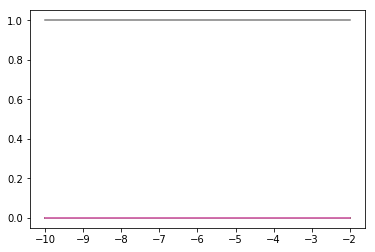

In [18]:
n_alphas = 100
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(xTrain, yTrain)
    coefs.append(ridge.coef_)
plt.plot(np.log10(alphas),coefs)

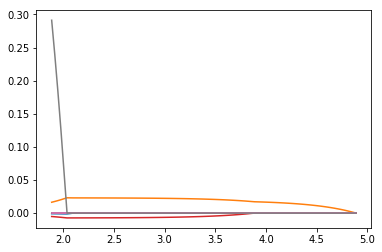

In [19]:
plt.figure(1)
alphas_lasso, coefs_lasso, _ = lasso_path(xTrain,yTrain)
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in (coefs_lasso):
    l1 = plt.plot(log_alphas_lasso, coef_l)
plt.show()

# 5(d)

In [20]:
xTrain, xTest, yTrain, yTest = train_test_split(dataset, y, test_size = 1/5, random_state = 0)

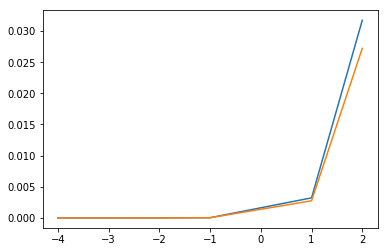

In [21]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e1, 1e2]

train_errors = []
test_errors = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(xTrain, yTrain)
    pred_train = ridge.predict(xTrain)
    mse = np.mean((yTrain - pred_train)**2)
    train_errors.append(np.sqrt(mse))
    
    pred_test = ridge.predict(xTest)
    mse = np.mean((yTest - pred_test)**2)
    test_errors.append(np.sqrt(mse))

plt.plot(np.log10(alphas),train_errors)
plt.plot(np.log10(alphas),test_errors)